# 사후분석

In [22]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
preds_valid = pd.read_csv('../valid_output.csv')
preds_valid = preds_valid[['text', 'target', 'pred']]
preds_valid

,text,target,pred
0,현대 硏 국면 진입 급격한 불황 우려,1,1
1,한국노총 광주형 일자리 반대하는 민주노총에 그릇된 목소리,2,2
2,현대차증권 7월부터 증권으로,1,1
3,그래픽 2021학년도 수능 영역별 표준점수 최고점,2,2
4,伊 연정 위기 틈타 부활 노리나 극우 정당과 밀착하는 베를루스코니,4,4
...,...,...,...
4091,사이영상 투표한 미국 기자 류현진 수상 자격 있어,5,5
4092,메탈리카 백 투 프런트,3,3
4093,2년 만에 A매치 골 역대 최다득점자,5,5
4094,KT 비즈 메카이지 이용고객 10만 돌파,0,0


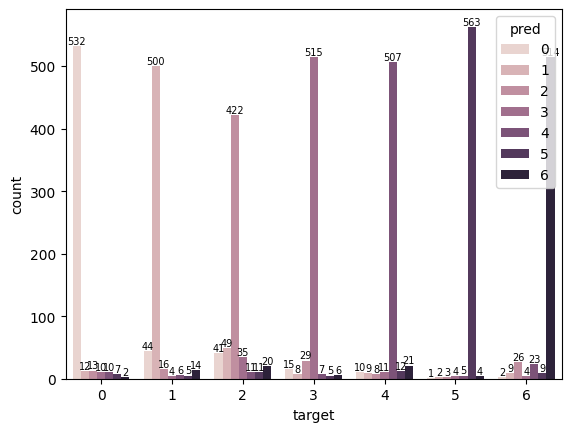

In [24]:
ax = sns.countplot(x='target', hue='pred', data=preds_valid)
for i in range(7):
    ax.bar_label(ax.containers[i], label_type='edge', size=7)

In [25]:
for i in range(7):
    print(f'{i} accuracy: {accuracy_score(preds_valid["target"] == i, preds_valid["pred"] == i)}')
    counts = [sum((preds_valid["target"]==i) & (preds_valid["pred"] == j)) for j in range(7)]
    total = len(preds_valid[preds_valid["target"] == i])
    for idx, count in enumerate(counts):
        print(f'{i} -> {idx} accuracy: {count*100/total}')
    print("------------------\n")

0 accuracy: 0.959228515625
0 -> 0 accuracy: 90.78498293515358
0 -> 1 accuracy: 2.04778156996587
0 -> 2 accuracy: 2.218430034129693
0 -> 3 accuracy: 1.7064846416382253
0 -> 4 accuracy: 1.7064846416382253
0 -> 5 accuracy: 1.1945392491467577
0 -> 6 accuracy: 0.3412969283276451
------------------

1 accuracy: 0.95654296875
1 -> 0 accuracy: 7.470288624787776
1 -> 1 accuracy: 84.88964346349745
1 -> 2 accuracy: 2.7164685908319184
1 -> 3 accuracy: 0.6791171477079796
1 -> 4 accuracy: 1.0186757215619695
1 -> 5 accuracy: 0.8488964346349746
1 -> 6 accuracy: 2.3769100169779285
------------------

2 accuracy: 0.93603515625
2 -> 0 accuracy: 6.960950764006792
2 -> 1 accuracy: 8.31918505942275
2 -> 2 accuracy: 71.64685908319186
2 -> 3 accuracy: 5.942275042444821
2 -> 4 accuracy: 1.867572156196944
2 -> 5 accuracy: 1.867572156196944
2 -> 6 accuracy: 3.395585738539898
------------------

3 accuracy: 0.96630859375
3 -> 0 accuracy: 2.5641025641025643
3 -> 1 accuracy: 1.3675213675213675
3 -> 2 accuracy: 4.95

In [26]:
# wrong prediction
wrong_pred = preds_valid[preds_valid['target'] != preds_valid['pred']]
wrong_pred['text']

15           유튜브 영어 생방송에 자동 영문 자막 붙는다
16        강릉 출신 이순원이 사실에 가깝게 복원한 신사임당
23               평양정상회담 봉 촬영 하는 문 대통령
26       눈물 쏟은 문경은 선수 때 우승하고도 안 울었는데 
29        평화로웠던 금요예배 총탄 세례 아비규환 속 공포의
                    ...              
4058       美 北 무수단 추정 미사일 오전 7시 발사 실패
4064    오스트리아 사상 첫 여성 총리 탄생 비라는 헌재 소장
4070          대통령 이탈리아 총리와 정상회담 공조 확대
4078        SW 학생 전문가가 알려주는 채용 정보 듣는다
4088    온몸으로 한방 바이오를 느끼다 제천 한방엑스포 D20
Name: text, Length: 543, dtype: object

In [27]:
# IT과학(0), 경제(1), 사회(2), 생활문화(3), 세계(4), 스포츠(5), 정치(6)
label_dict = {0: 'IT과학', 1: '경제', 2: '사회', 3: '생활문화', 4: '세계', 5: '스포츠', 6: '정치'}
#convert integer labels to string labels
wrong_pred['target'] = wrong_pred['target'].replace(label_dict)
wrong_pred['pred'] = wrong_pred['pred'].replace(label_dict)

/tmp/ipykernel_556797/669740416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['target'] = wrong_pred['target'].replace(label_dict)
/tmp/ipykernel_556797/669740416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['pred'] = wrong_pred['pred'].replace(label_dict)


In [28]:
# count pair of target and pred
wrong_pred['pair'] = wrong_pred['target'] + '-' + wrong_pred['pred']
pd.set_option('display.max_rows', 50)
wrong_pred

/tmp/ipykernel_556797/2573594692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['pair'] = wrong_pred['target'] + '-' + wrong_pred['pred']


,text,target,pred,pair
15,유튜브 영어 생방송에 자동 영문 자막 붙는다,생활문화,IT과학,생활문화-IT과학
16,강릉 출신 이순원이 사실에 가깝게 복원한 신사임당,사회,생활문화,사회-생활문화
23,평양정상회담 봉 촬영 하는 문 대통령,사회,정치,사회-정치
26,눈물 쏟은 문경은 선수 때 우승하고도 안 울었는데,IT과학,스포츠,IT과학-스포츠
29,평화로웠던 금요예배 총탄 세례 아비규환 속 공포의,사회,생활문화,사회-생활문화
...,...,...,...,...
4058,美 北 무수단 추정 미사일 오전 7시 발사 실패,정치,세계,정치-세계
4064,오스트리아 사상 첫 여성 총리 탄생 비라는 헌재 소장,생활문화,세계,생활문화-세계
4070,대통령 이탈리아 총리와 정상회담 공조 확대,정치,세계,정치-세계
4078,SW 학생 전문가가 알려주는 채용 정보 듣는다,사회,IT과학,사회-IT과학
